In [5]:
import nsepy
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [6]:
#!pip install nsepy
#!pip install sklearn
#!pip install tensorflow

In [7]:
start = dt.datetime(2019,1,1)
end = dt.datetime(2021,7,30)
nsepy.urls.index_history_url.url
stk_data = gh(symbol='NIFTY REALTY',start=start,end=end, index=True)
stk_data.reset_index(inplace=True)
stk_data.head()
stk_data.to_csv('./a' +'.csv',index=False)a

SyntaxError: invalid syntax (<ipython-input-7-c5f41a2f601c>, line 7)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
plt.figure(figsize=(14,14))
plt.scatter(stk_data['Date'],stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

NameError: name 'plt' is not defined

In [5]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
## Take only open price in a array
train_set = data2.iloc[:, 1:2].values
print(train_set.shape)

(619, 1)


In [6]:

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

training_set_scaled.shape

(619, 1)

In [9]:
X_train = []
y_train = []
type(X_train)
training_set_scaled[60-60:60, 0].shape

(60,)

In [10]:
X_train = []
y_train = []
type(X_train)
for i in range(15, 619):
    X_train.append(training_set_scaled[i-15:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
#np.expand_dims(X_train,)
X_train.shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    

X_train.shape[1]

15

In [11]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

2021-07-11 23:15:25.383570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-11 23:15:25.383601: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-11 23:15:25.383624: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rocksolid): /proc/driver/nvidia/version does not exist
2021-07-11 23:15:25.383841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

2021-07-11 23:15:40.277594: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-11 23:15:40.300064: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1899950000 Hz


Epoch 1/100
19/19 [==============================] - 4s 18ms/step - loss: 0.0911
Epoch 2/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0181
Epoch 3/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0120
Epoch 4/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0111
Epoch 5/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0108
Epoch 6/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0092
Epoch 7/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0105
Epoch 8/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0107
Epoch 9/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0104
Epoch 10/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0099
Epoch 11/100
19/19 [==============================] - 0s 21ms/step - loss: 0.0095
Epoch 12/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0102
Epoch 13/100
19/19 [=====

In [10]:
hist = pd.DataFrame(regressor.history.history)
hist['epoch'] = regressor.history.epoch
hist.head()

NameError: name 'regressor' is not defined

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

KeyError: 'val_loss'

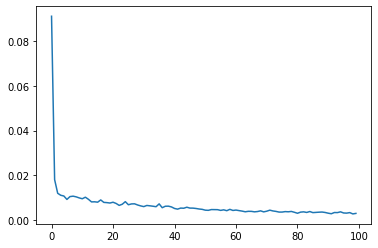

In [19]:
plot_loss(regressor.history)

In [ ]:
#Fetching the test data and preprocessing
testdataframe = gh(symbol='BANKNIFTY',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18),index=True)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'BankNifty Index Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Bank Nifty Index Price')
plt.title('Bank Nifty Index Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Bank Nifty Index Price')
plt.legend()
plt.show()